## GitHub

In [1]:
! git clone https://github.com/ali-sedaghi/Hybrid-ABSA.git

Cloning into 'Hybrid-ABSA'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 40 (delta 18), reused 30 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 17.29 KiB | 4.32 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
! cd Hybrid-ABSA/

/content/Hybrid-ABSA


In [3]:
! git pull origin main

From https://github.com/ali-sedaghi/Hybrid-ABSA
 * branch            main       -> FETCH_HEAD
Already up to date.


## Imports and Path Setup

In [4]:
import sys
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import torch

# Add parent directory to path to import models from root
sys.path.append(os.path.abspath('..'))

from models import InstructDeBERTa, BaselineModel
from evaluate import evaluate_model

# Ensure plots display inline
%matplotlib inline

## Load Demo Data

In [6]:
# Load the demo dataset from the local CSV
data_path = 'dataset.csv'
print(f"Loading data from {data_path}...")

df = pd.read_csv(data_path)

# Parse stringified lists into Python objects
dataset = []
for _, row in df.iterrows():
    try:
        gt = ast.literal_eval(row['ground_truth'])
        dataset.append({'text': row['text'], 'ground_truth': gt})
    except Exception as e:
        print(f"Skipping row: {e}")

print(f"Successfully loaded {len(dataset)} examples.")
df.head()

Loading data from dataset.csv...
Successfully loaded 11 examples.


,text,ground_truth
0,The food was excellent but the service was inc...,"[('food', 'Positive'), ('service', 'Negative')]"
1,"I love the ambiance, but the prices are too high.","[('ambiance', 'Positive'), ('prices', 'Negativ..."
2,The pizza is delicious.,"[('pizza', 'Positive')]"
3,"We waited for an hour, the table was dirty.","[('table', 'Negative')]"
4,Great staff and amazing wine list.,"[('staff', 'Positive'), ('wine list', 'Positiv..."


## Initialize Models

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

# Initialize Proposed Model (Beam Size = 1)
print("Loading Instruct-DeBERTa (Beam=1)...")
model_v1 = InstructDeBERTa(device=device, beam_size=1)

# Initialize Proposed Model with Hyperparameter Change (Beam Size = 3)
print("Loading Instruct-DeBERTa (Beam=3)...")
model_v2 = InstructDeBERTa(device=device, beam_size=3)

# Initialize Baseline
print("Loading Baseline (DistilBERT)...")
model_base = BaselineModel(device=device)

Running on: cpu
Loading Instruct-DeBERTa (Beam=1)...
[Instruct-DeBERTa] Loading on cpu (Beam Size: 1)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/284 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/202 [00:00<?, ?it/s]

DebertaV2ForSequenceClassification LOAD REPORT from: yangheng/deberta-v3-base-absa-v1.1
Key                             | Status     |  | 
--------------------------------+------------+--+-
deberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Loading Instruct-DeBERTa (Beam=3)...
[Instruct-DeBERTa] Loading on cpu (Beam Size: 3)...


Loading weights:   0%|          | 0/284 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Loading weights:   0%|          | 0/202 [00:00<?, ?it/s]

DebertaV2ForSequenceClassification LOAD REPORT from: yangheng/deberta-v3-base-absa-v1.1
Key                             | Status     |  | 
--------------------------------+------------+--+-
deberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading Baseline (DistilBERT)...
[Baseline] Loading DistilBERT on cpu...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Run Analysis

In [10]:
print("Evaluating Baseline...")
# Capture both metrics (res_base) and details (details_base)
res_base, details_base = evaluate_model(model_base, dataset, model_name="Baseline")

print("Evaluating Instruct-DeBERTa (Beam=1)...")
res_v1, details_v1 = evaluate_model(model_v1, dataset, model_name="Instruct-DeBERTa (B=1)")

print("Evaluating Instruct-DeBERTa (Beam=3)...")
res_v2, details_v2 = evaluate_model(model_v2, dataset, model_name="Instruct-DeBERTa (B=3)")

# --- 1. Display Metrics Summary ---
print("\n--- Summary Metrics ---")
results = pd.DataFrame([
    {'Model': 'Baseline', **res_base},
    {'Model': 'Instruct-DeBERTa (B=1)', **res_v1},
    {'Model': 'Instruct-DeBERTa (B=3)', **res_v2}
])
display(results)

Evaluating Baseline...
Evaluating Instruct-DeBERTa (Beam=1)...
Evaluating Instruct-DeBERTa (Beam=3)...

--- Summary Metrics ---


,Model,ATE_F1,ASC_Accuracy,ASC_F1
0,Baseline,0.0000,0.8125,0.8118
1,Instruct-DeBERTa (B=1),0.2581,0.7500,0.7667
2,Instruct-DeBERTa (B=3),0.0741,1.0000,1.0000


In [11]:
# --- 2. Display Detailed Predictions for Every Data Point ---
print("\n--- Detailed Predictions (First 20 rows) ---")
# Combine all details into one DataFrame
all_details = pd.DataFrame(details_base + details_v1 + details_v2)

# Reorder columns for better readability
cols = ["Model", "Input Text", "Predicted Raw", "Extracted Aspects", "Predicted Sentiments", "Ground Truth"]
all_details = all_details[cols]

# Display the dataframe (using .head() or full display)
display(all_details)

# Optional: Save to CSV within the notebook if needed
# all_details.to_csv("demo_detailed_predictions.csv", index=False)


--- Detailed Predictions (First 20 rows) ---


,Model,Input Text,Predicted Raw,Extracted Aspects,Predicted Sentiments,Ground Truth
0,Baseline,The food was excellent but the service was inc...,Negative,"['food', 'service']","['Negative', 'Negative']","[('food', 'Positive'), ('service', 'Negative')]"
1,Baseline,"I love the ambiance, but the prices are too high.",Negative,"['ambiance', 'prices']","['Negative', 'Negative']","[('ambiance', 'Positive'), ('prices', 'Negativ..."
2,Baseline,The pizza is delicious.,Positive,['pizza'],['Positive'],"[('pizza', 'Positive')]"
3,Baseline,"We waited for an hour, the table was dirty.",Negative,['table'],['Negative'],"[('table', 'Negative')]"
4,Baseline,Great staff and amazing wine list.,Positive,"['staff', 'wine list']","['Positive', 'Positive']","[('staff', 'Positive'), ('wine list', 'Positiv..."
5,Baseline,The owner is rude.,Negative,['owner'],['Negative'],"[('owner', 'Negative')]"
6,Baseline,Reasonable prices for such good quality.,Positive,"['prices', 'quality']","['Positive', 'Positive']","[('prices', 'Positive'), ('quality', 'Positive')]"
7,Baseline,The decor is outdated.,Negative,['decor'],['Negative'],"[('decor', 'Negative')]"
8,Baseline,I will never go back to this place.,Positive,[],[],[]
9,Baseline,The lasagna was cold and the cheese was rubbery.,Negative,"['lasagna', 'cheese']","['Negative', 'Negative']","[('lasagna', 'Negative'), ('cheese', 'Negative')]"


## Generate Graphical Outputs

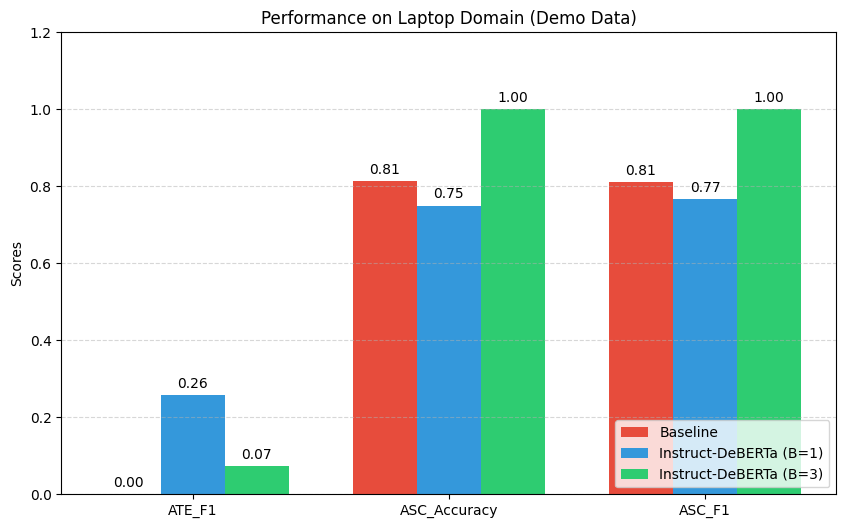

In [12]:
# Visualization
metrics = ['ATE_F1', 'ASC_Accuracy', 'ASC_F1']
models = results['Model'].tolist()

x = range(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c', '#3498db', '#2ecc71']

for i, model in enumerate(models):
    vals = results.loc[i, metrics].values
    offset = (i - len(models)/2) * width + width/2
    rects = ax.bar([p + offset for p in x], vals, width, label=model, color=colors[i])
    ax.bar_label(rects, padding=3, fmt='%.2f')

ax.set_ylabel('Scores')
ax.set_title('Performance on Laptop Domain (Demo Data)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.2)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Interactive Prediction

In [14]:
# Try your own sentence here!
text = "I love the ambiance, but the prices are too high."

print(f"Input: {text}\n")
print(f"Baseline Prediction: {model_base.predict_sentiment(text)}")
print(f"Instruct-DeBERTa Prediction: {model_v1.predict(text)}")

Input: I love the ambiance, but the prices are too high.

Baseline Prediction: Negative
Instruct-DeBERTa Prediction: [('ambiance', 'Positive'), ('prices', 'Negative'), ('and ambiance are too high.', 'Negative')]
